# This is a NO2 Machine Learning model using various types 
* Linear Regression
* Ridge
* Lasso
* Elastic net 

We will Compare each rate and predicted value and focus on the Mean Square Error 'MSE'

-----------------------------------------------

## Standerd Imports 

In [389]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff

arffFile = arff.loadarff("no2.arff")
No2File = pd.DataFrame(arffFile[0])

print("Setup Completed")
No2File.info(),No2File.describe()

Setup Completed
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   no2_concentration        500 non-null    float64
 1   cars_per_hour            500 non-null    float64
 2   temperature_at_2m        500 non-null    float64
 3   wind_speed               500 non-null    float64
 4   temperature_diff_2m_25m  500 non-null    float64
 5   wind_direction           500 non-null    float64
 6   hour_of_day              500 non-null    float64
 7   day                      500 non-null    float64
dtypes: float64(8)
memory usage: 31.4 KB


(None,
        no2_concentration  cars_per_hour  temperature_at_2m  wind_speed  \
 count         500.000000     500.000000         500.000000  500.000000   
 mean            3.698368       6.973342           0.847400    3.056000   
 std             0.750597       1.087166           6.524636    1.784172   
 min             1.223780       4.127130         -18.600000    0.300000   
 25%             3.213862       6.175842          -3.900000    1.675000   
 50%             3.848020       7.425360           1.100000    2.800000   
 75%             4.216930       7.793175           4.900000    4.200000   
 max             6.395090       8.348540          21.100000    9.900000   
 
        temperature_diff_2m_25m  wind_direction  hour_of_day         day  
 count               500.000000      500.000000   500.000000  500.000000  
 mean                  0.149400      143.370400    12.382000  310.474000  
 std                   1.065237       86.510213     6.802693  200.977754  
 min            

c:\Users\basse\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


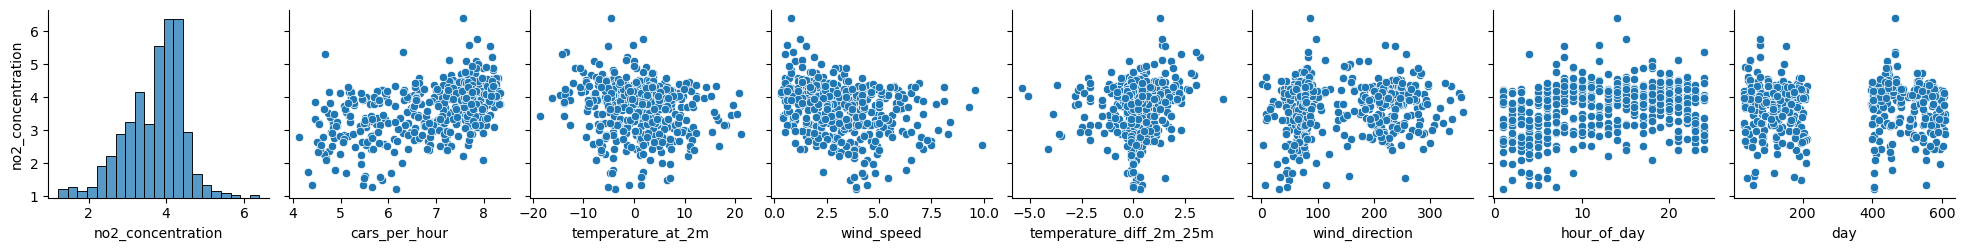

In [390]:
X = No2File.drop("no2_concentration",axis=1)
y = No2File["no2_concentration"]

sns.pairplot(No2File,y_vars="no2_concentration");

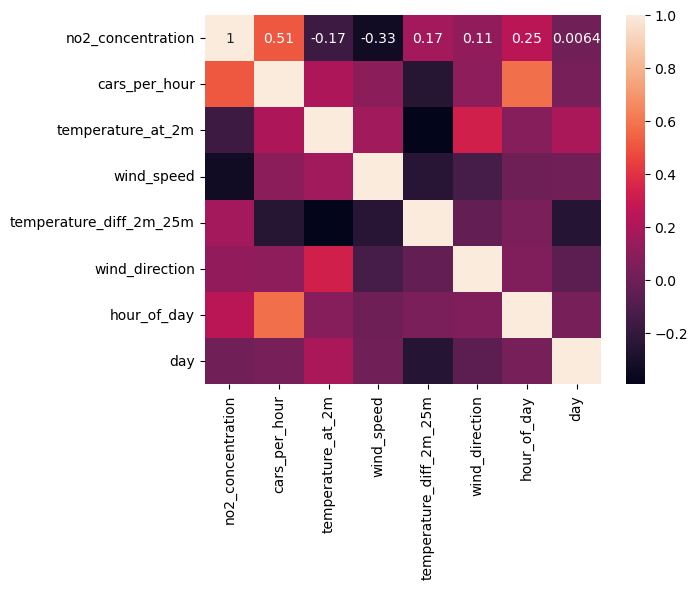

In [391]:
sns.heatmap(data=No2File.corr(),annot=True);

In [392]:
from sklearn.model_selection import (train_test_split,StratifiedKFold,KFold)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn import metrics
from sklearn.utils.multiclass import type_of_target
# We will Create 2 types of Data : 1- Normalaized and 2- Standerlized

sc = StandardScaler()
norm = Normalizer()


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42) 


skf = KFold(n_splits=5,shuffle=True,random_state=42)

X_train



,cars_per_hour,temperature_at_2m,wind_speed,temperature_diff_2m_25m,wind_direction,hour_of_day,day
5,7.67183,2.6,1.6,0.3,224.2,19.0,527.0
116,7.54750,-8.0,0.3,-0.2,289.0,14.0,95.0
45,8.34854,2.7,7.7,0.1,219.0,17.0,159.0
16,6.61740,6.5,4.1,0.0,88.0,24.0,186.0
462,5.14749,-9.0,1.3,0.4,77.0,2.0,88.0
...,...,...,...,...,...,...,...
106,4.89035,-4.1,6.3,-0.1,45.1,6.0,455.0
270,7.27586,-7.2,1.3,1.0,85.0,21.0,143.0
348,7.99934,4.8,2.6,0.3,194.0,16.0,126.0
435,4.64439,-3.3,1.9,1.3,88.0,3.0,51.0


In [393]:
def PrintMetrics(true,predict):
        MSE = metrics.mean_squared_error(true,predict)
        MAE = metrics.mean_absolute_error(true,predict)
        Acu_score = metrics.mean_absolute_percentage_error(true,predict)
        
        print("MSE : ",MSE)
        print("MAE : ",MAE)
        print(f"Accuracy Precentage : {((1-Acu_score)*100):.04f}% \n" )

def KfoldsAccurecy(Model , X_train=X_train, y_train=y_train):
    X_train = X_train.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    fold=1
    for train_idx, test_idx in skf.split(X=X_train,y=y_train):
        X_tr = X_train.iloc[train_idx]
        y_tr = y_train.iloc[train_idx]
        
        X_tst = X_train.iloc[test_idx]
        y_tst = y_train.iloc[test_idx]
        # Standerlized
        X_tr_sc, X_tst_sc = sc.fit_transform(X_tr), sc.transform(X_tst)
         # Normalaized
        X_tr_norm, X_tst_norm = norm.fit_transform(X_tr), norm.transform(X_tst)
        print(f"\n\n=====Fold {fold} =====")
        print("Standardiazation:")
        Model.fit(X_tr_sc,y_tr)
        Pred = Model.predict(X_tst_sc)
        PrintMetrics(y_tst,Pred)
        print("Normalization")
        Model.fit(X_tr_norm,y_tr)
        Pred = Model.predict(X_tst_norm)
        PrintMetrics(y_tst,Pred)
        fold+=1
        
        
def plot_model(model, X, y, model_name='', **kwargs):
   
    # Make predictions
    y_pred = model.predict(X)
    
    # Calculate MSE
    mse = metrics.mean_squared_error(y, y_pred)
    
    # Plot actual vs. predicted
    plt.figure(figsize=(8, 6))
    plt.scatter(y, y_pred, color='blue', label=f'{model_name} Predictions (MSE: {mse:.2f})', marker='o')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Perfect Prediction')
    
    # Customize plot
    plt.title(f'{model_name} Predictions vs. Actual')
    plt.xlabel(kwargs.get('xlabel', 'Actual Values'))
    plt.ylabel(kwargs.get('ylabel', 'Predicted Values'))
    plt.legend()
    plt.grid(True)
    
    # Show plot
    plt.show()

                

--------------------

* ## Linear Regression model

In [394]:
from sklearn.linear_model import LinearRegression

# Create the linear regression model
linear_model = LinearRegression()

#Standardization model
KfoldsAccurecy(linear_model)



=====Fold 1 =====
Standardiazation:
MSE :  0.3416152676997897
MAE :  0.44283517121590243
Accuracy Precentage : 84.5340% 

Normalization
MSE :  0.4779511030804786
MAE :  0.5408511533932631
Accuracy Precentage : 80.7303% 



=====Fold 2 =====
Standardiazation:
MSE :  0.32817127131103857
MAE :  0.4788589064128133
Accuracy Precentage : 85.2653% 

Normalization
MSE :  0.5429777994901744
MAE :  0.5982515152756059
Accuracy Precentage : 81.0730% 



=====Fold 3 =====
Standardiazation:
MSE :  0.289135924115523
MAE :  0.4205880818956701
Accuracy Precentage : 87.2027% 

Normalization
MSE :  0.43811447060148745
MAE :  0.5613590226802705
Accuracy Precentage : 82.8122% 



=====Fold 4 =====
Standardiazation:
MSE :  0.29628180670949167
MAE :  0.394918929872235
Accuracy Precentage : 86.7186% 

Normalization
MSE :  0.4894452845340325
MAE :  0.5342895046452665
Accuracy Precentage : 82.4116% 



=====Fold 5 =====
Standardiazation:
MSE :  0.20696471167531133
MAE :  0.3720939339529799
Accuracy Precentage

In [395]:
linear_model.fit(X_train,y_train)
predict = linear_model.predict(X_test)

PrintMetrics(y_test,predict=predict)

MSE :  0.26104512804963054
MAE :  0.40048352066770615
Accuracy Precentage : 87.8799% 



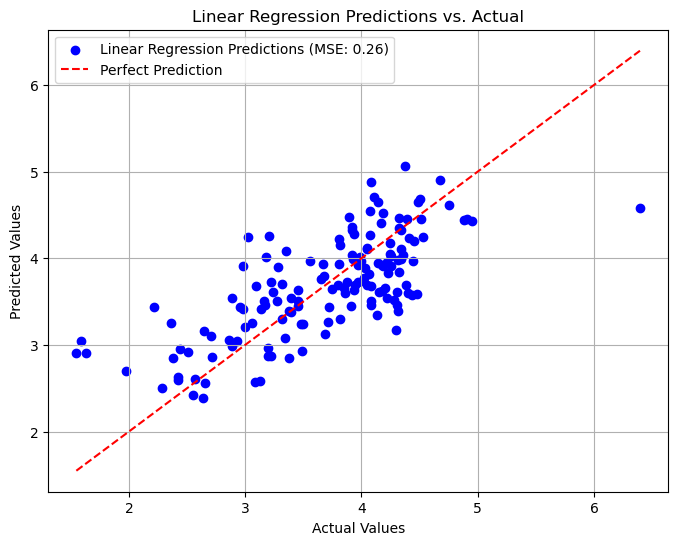

In [396]:
plot_model(linear_model, X_test, y_test, model_name='Linear Regression', xlabel='Actual Values', ylabel='Predicted Values')


-------

* ## Ridge

In [397]:
from sklearn.linear_model import Ridge

# Create the Ridge model
ridge_model = Ridge()

KfoldsAccurecy(ridge_model,X_train=X_train,y_train=y_train)




=====Fold 1 =====
Standardiazation:
MSE :  0.34134356003274685
MAE :  0.44302824392824464
Accuracy Precentage : 84.5157% 

Normalization
MSE :  0.5953081695867789
MAE :  0.5932225838509492
Accuracy Precentage : 78.1010% 



=====Fold 2 =====
Standardiazation:
MSE :  0.32862846132525486
MAE :  0.4792576670176633
Accuracy Precentage : 85.2466% 

Normalization
MSE :  0.6778262393058287
MAE :  0.6711973615301026
Accuracy Precentage : 78.1531% 



=====Fold 3 =====
Standardiazation:
MSE :  0.2890016309727737
MAE :  0.4205090441561056
Accuracy Precentage : 87.2051% 

Normalization
MSE :  0.5524082476210376
MAE :  0.581293238903888
Accuracy Precentage : 82.3325% 



=====Fold 4 =====
Standardiazation:
MSE :  0.29599042045066726
MAE :  0.39474622674468873
Accuracy Precentage : 86.7203% 

Normalization
MSE :  0.5556269107805212
MAE :  0.5688103302804942
Accuracy Precentage : 81.4562% 



=====Fold 5 =====
Standardiazation:
MSE :  0.20729751160725535
MAE :  0.3725543707449856
Accuracy Precenta

In [398]:
ridge_model.fit(X_train,y_train)
predict = ridge_model.predict(X_test)
PrintMetrics(y_test,predict=predict)

MSE :  0.26093951143234295
MAE :  0.400450471476254
Accuracy Precentage : 87.8776% 



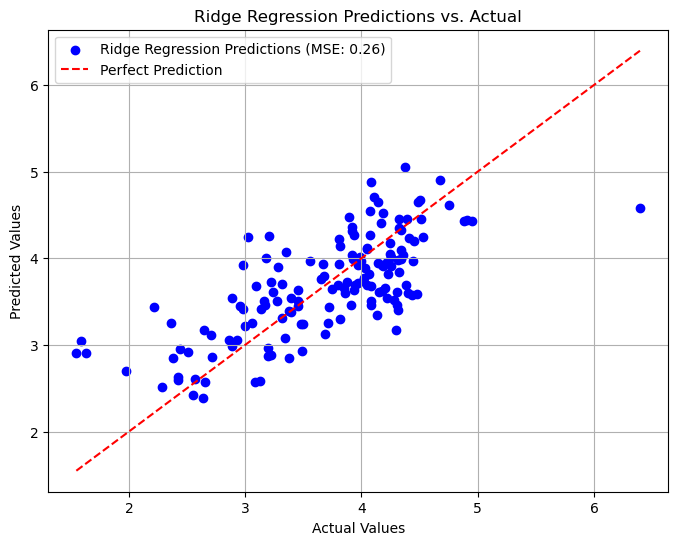

In [399]:
plot_model(ridge_model, X_test, y_test, model_name='Ridge Regression', xlabel='Actual Values', ylabel='Predicted Values')


----

* ## Lasso Model

In [400]:
from sklearn.linear_model import Lasso

# Create the Lasso model
lasso_model = Lasso()

KfoldsAccurecy(lasso_model)



=====Fold 1 =====
Standardiazation:
MSE :  0.5870456228222971
MAE :  0.5902757316326531
Accuracy Precentage : 78.1136% 

Normalization
MSE :  0.5870456228222971
MAE :  0.5902757316326531
Accuracy Precentage : 78.1136% 



=====Fold 2 =====
Standardiazation:
MSE :  0.6906520620116544
MAE :  0.6741681214285715
Accuracy Precentage : 77.9769% 

Normalization
MSE :  0.6906520620116544
MAE :  0.6741681214285715
Accuracy Precentage : 77.9769% 



=====Fold 3 =====
Standardiazation:
MSE :  0.5669597498391543
MAE :  0.5883620775510204
Accuracy Precentage : 82.0907% 

Normalization
MSE :  0.5669597498391543
MAE :  0.5883620775510204
Accuracy Precentage : 82.0907% 



=====Fold 4 =====
Standardiazation:
MSE :  0.5739840349582971
MAE :  0.5760130102040815
Accuracy Precentage : 81.1704% 

Normalization
MSE :  0.5739840349582971
MAE :  0.5760130102040815
Accuracy Precentage : 81.1704% 



=====Fold 5 =====
Standardiazation:
MSE :  0.4363525223360461
MAE :  0.5504791346938774
Accuracy Precentage : 

In [401]:
lasso_model.fit(X_train,y_train)
predict = lasso_model.predict(X_test)
PrintMetrics(y_test,predict=predict)

MSE :  0.5353243252125149
MAE :  0.5934110655194336
Accuracy Precentage : 81.2514% 



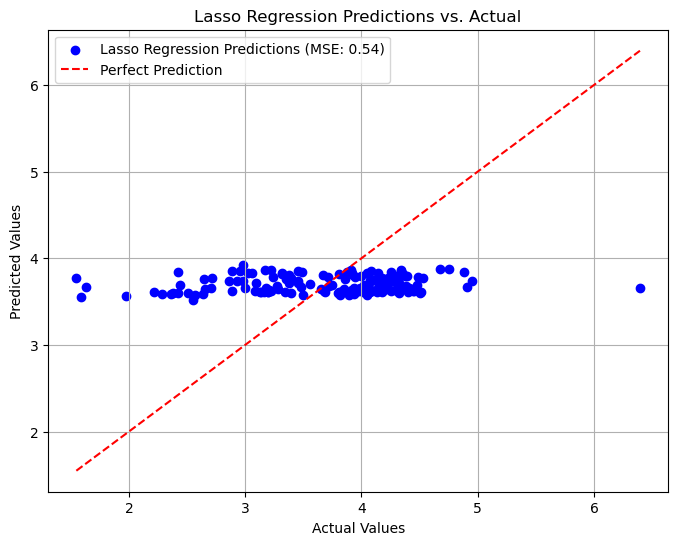

In [402]:
plot_model(lasso_model, X_test, y_test, model_name='Lasso Regression', xlabel='Actual Values', ylabel='Predicted Values')


----

* ## Elastic

In [403]:
from sklearn.linear_model import ElasticNet

# Create the Elastic Net model
elastic_net_model = ElasticNet()

KfoldsAccurecy(elastic_net_model)



=====Fold 1 =====
Standardiazation:
MSE :  0.5870456228222971
MAE :  0.5902757316326531
Accuracy Precentage : 78.1136% 

Normalization
MSE :  0.5870456228222971
MAE :  0.5902757316326531
Accuracy Precentage : 78.1136% 



=====Fold 2 =====
Standardiazation:
MSE :  0.6906520620116544
MAE :  0.6741681214285715
Accuracy Precentage : 77.9769% 

Normalization
MSE :  0.6906520620116544
MAE :  0.6741681214285715
Accuracy Precentage : 77.9769% 



=====Fold 3 =====
Standardiazation:
MSE :  0.5669597498391543
MAE :  0.5883620775510204
Accuracy Precentage : 82.0907% 

Normalization
MSE :  0.5669597498391543
MAE :  0.5883620775510204
Accuracy Precentage : 82.0907% 



=====Fold 4 =====
Standardiazation:
MSE :  0.5739840349582971
MAE :  0.5760130102040815
Accuracy Precentage : 81.1704% 

Normalization
MSE :  0.5739840349582971
MAE :  0.5760130102040815
Accuracy Precentage : 81.1704% 



=====Fold 5 =====
Standardiazation:
MSE :  0.4363525223360461
MAE :  0.5504791346938774
Accuracy Precentage : 

In [404]:
elastic_net_model.fit(X_train, y_train)

# Predict on the test data
predict = elastic_net_model.predict(X_test)

PrintMetrics(y_test,predict=predict)

MSE :  0.48991703533067477
MAE :  0.5690526618351669
Accuracy Precentage : 82.1495% 



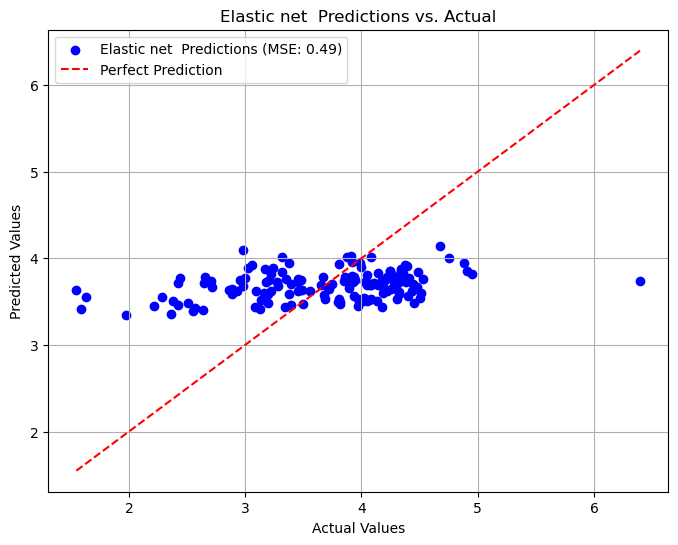

In [406]:
plot_model(elastic_net_model, X_test, y_test, model_name='Elastic net ', xlabel='Actual Values', ylabel='Predicted Values')


### So looking at the MSE and Accuracy, The Linear regression was the best model winning the Ridge model by a fraction of .02%